#import libararies & installation

In [ ]:
!pip install gensim


In [ ]:
!pip install num2words


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=618d083747629dc5904de1b6944eec4d57bfc21bf416f66aa79fd345b6480cc9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
import re
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#load & preprocessing

In [ ]:
traindata = pd.read_excel("/content/drive/MyDrive/NLP/News_train.xlsx")
testdata = pd.read_excel("/content/drive/MyDrive/NLP/News_test.xlsx")


In [ ]:
traindata

,Type,News
0,politics,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...
1,politics,عون: الحريري أصبح غريب الأطوار
2,politics,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...
3,politics,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...
4,politics,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي
...,...,...
4995,politics,أوروبا تبدأ إحصاء خسائر الفيضانات المدمرة
4996,politics,قتل متظاهر بالرصاص خلال احتجاجات على شحّ الميا...
4997,politics,وسائل إعلام إيرانية تتحدث عن اندلاع احتجاجات ف...
4998,politics,المفاوضات الأفغانية تتواصل في العاصمة القطرية ...


<Axes: xlabel='Type'>

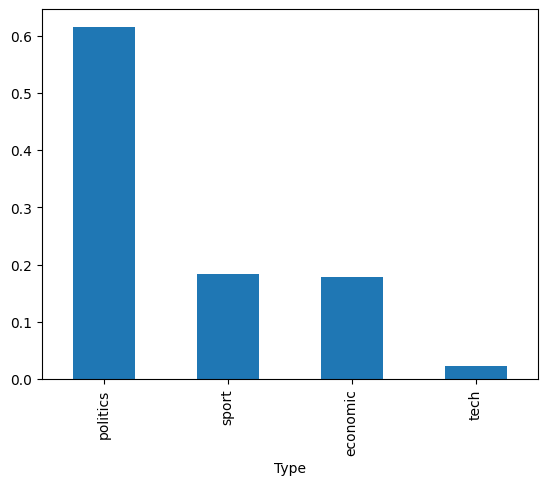

In [ ]:
traindata['Type'].value_counts(normalize = True).plot.bar()

In [ ]:
traindata['Type'].unique()

array(['politics', 'economic', 'sport', 'tech'], dtype=object)

In [ ]:
traindata['Type'] = traindata['Type'].replace({'politics': 0, 'economic': 1, 'sport': 2, 'tech': 3})


In [ ]:
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'آب', 'جيم', 'أصلا', 'ما أفعله', 'جوان', 'اللذان', 'كثيرا', 'غدا', 'أوه', 'بهن', 'اربعون', 'ثم', 'جعل', 'خبَّر', 'عشر', 'أبو', 'بس', 'ضاد', 'حسب', 'كم', 'معاذ', 'كِخ', 'أما', 'التي', 'حزيران', 'ياء', 'ش', 'آي', 'متى', 'هلّا', 'أعطى', 'تجاه', 'نيف', 'سحقا', 'لستم', 'نعم', 'بيد', 'ستمئة', 'نحن', 'بلى', 'له', 'ظنَّ', 'عدا', 'آناء', 'أوت', 'أيّان', 'مما', 'بخٍ', 'أجل', 'يورو', 'صار', 'ما', 'مئتان', 'ن', 'ب', 'والذي', 'هاك', 'حبذا', 'غداة', 'كيت', 'رجع', 'أربعمائة', 'أربع', 'إياكما', 'ستين', 'ذاك', 'رزق', 'أين', 'ممن', 'هَذِي', 'صراحة', 'حمدا', 'مايو', 'بعدا', 'دواليك', 'م', 'مه', 'ثان', 'الآن', 'أخٌ', 'فو', 'إياك', 'ذانك', 'اللواتي', 'فوق', 'ريال', 'أكثر', 'هذان', 'ذال', 'لا', 'أخو', 'لهم', 'بئس', 'قبل', 'إحدى', 'لاسيما', 'ألا', 'أربعة', 'هنالك', 'أصبح', 'بما', 'يمين', 'لكما', 'كليكما', 'جانفي', 'نفس', 'بك', 'نبَّا', 'سبت', 'نَخْ', 'لو', 'مئة', 'أولالك', 'لمّا', 'به', 'ظ', 'تفعلون', 'تسع', 'انبرى', 'أسكن', 'يفعلون', 'خ', 'يناير', 'ولو', 'أنّى', 'خلا', 'لعل', 'هناك', 'أعلم', 'كأنّ', 'كان',

In [ ]:
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
   # ازالة الحركات
    noise = re.compile(""" ّ    | # Tashdid
                       َ    | # Fatha
                       ً    | # Tanwin Fath
                       ُ    | # Damma
                       ٌ    | # Tanwin Damm
                       ِ    | # Kasra
                       ٍ    | # Tanwin Kasr
                       ْ    | # Sukun
                      ـ     # Tatwil/Kashida
                    """, re.VERBOSE)
    processed_text = re.sub(noise, '', text)
    processed_text = re.sub(r'(.)\1+', r"\1\1", text)
    tokens = nltk.word_tokenize(text)

    #punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
    #tokens = [token for token in tokens if re.match(r'\w', token) or token == '?']
    numbers = re.compile(r'\b\d+\b')
    stop_words = set(stopwords.words('arabic'))
    tokens = [token for token in tokens if token not in stop_words]

    # 5. lemmatization
    #هي عمليه ارجاع الكلمات الى جذورها الاصليه
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    #تحويل الكلمات إلى نص مرة اخرى
    processed_text = ' '.join(tokens).strip()

    # Remove longation (diacritics) and numbers
    processed_text = re.sub(r'\b\d+\b', replace_numbers_with_words, processed_text)
    processed_text = re.sub("[إأآا]", "ا", processed_text)
    processed_text = re.sub("ى", "ي", processed_text)
    processed_text = re.sub("ؤ", "و", processed_text)
    processed_text = re.sub("ئ", "ي", processed_text)
    processed_text = re.sub("ة", "ه", processed_text)
    processed_text = re.sub("گ", "ك", processed_text)
    processed_text = re.sub("أ", "ا", processed_text)
    processed_text = re.sub("إ", "ا", processed_text)
    processed_text = re.sub("لإ", "لا", processed_text)
    processed_text = re.sub(r"\b(ال|في|على|من|إلى|عن)\b", "", processed_text)
    processed_text = re.sub(r'[^\w\s]', '', processed_text)

    processed_text = re.sub("NFT", "الصور الرقمية ", processed_text)
    processed_text = re.sub("Covax ", "كوفاكس و هي ركيزة اللقاحات لمبادرة تسريع إتاحة أدوات مكافحة كوفيد", processed_text)
    processed_text = re.sub("Sony Airpeak", " ", processed_text)
    processed_text = re.sub("PCR", " اختبار مرض فايروس كورونا", processed_text)
    processed_text = re.sub("QS", " الخاص بالجامعات ", processed_text)
    processed_text = re.sub("سبوتنيك V", " ", processed_text)
    processed_text = re.sub("Xbox", " جهاز مايكروسوفت للألعاب", processed_text)
    processed_text = re.sub("كوفيد19", " فايروس كورونا", processed_text)
    processed_text = re.sub("الحريري-عون", " عون حريري", processed_text)


    processed_text = re.sub("[إأآا]", "ا", processed_text)
    # ازالة الحركات
    #diacritics_pattern = re.compile(r'[\u064B-\u0652\u064F-\u0655\u0670]')
    text = re.sub('[\u064B-\u0652\u064F-\u0655\u0670]', '', text)
    # فصل الكلمات العربية عن الانجليزية من خلال معرفة اذا ما كان الحرف انجليزي ام لا فيصع مسافة امامه
    processed_text = re.sub(r'[a-zA-Z]+', r' \g<0> ', processed_text)
    # جعل المافات الكثيرة مسافة واحدة فقط
    #strip() تزيل المسافات الزائدة
    processed_text = re.sub(r"\s+", " ", processed_text).strip()
    # ازالة حرف ال من اول كلمة تحتوي عليه

    processed_text = re.sub(r"\bو", "", processed_text)
    processed_text = re.sub(r"\bال", "", processed_text)
    processed_text = re.sub(r"\bوال", " ", processed_text)
    processed_text = re.sub(r"\bعال", " ", processed_text)
    processed_text = re.sub(r"\bفال", " ", processed_text)
    processed_text = re.sub("%", "بالمئة", processed_text)

    return processed_text.strip()

def replace_numbers_with_words(match):
    return num2words(int(match.group()), lang='ar')

In [ ]:
preprocessed_documents = [preprocess_text(doc) for doc in traindata['News']]
preprocessed_documents

['اشتباك حريريعون اتهامات لباسيل بالتمسك بالثلث معطل للبقاء حكم',
 'عون حريري غريب اطوار',
 'زير خارجيه امريكي ندرس سحب كامل قواتنا افغانستان بحلول',
 'افغانستان استعدادات حثيثه لاجتماع تركيا كابل تتهم طالبان بالتركيز حرب بدل سلام',
 'اندبندنت مفاوضات سريه كادت تنقذ قذافي',
 'سيف قذافي اتفاق قريب جدا ترحيل ممرضات طبيب بلغاريين',
 'قتلي دمار اف خيام حريق بمخيم للاجيين روهينغيا بنغلاديش',
 'بنغلاديش تشرع نقل اف روهينغا مسلمين جزيره ناييه',
 'انسحاب اتفاقيه اسطنبول ناشطات نسويات يتخوفن ايام صعبه',
 'ثيقه مخابراتيه تكشف دعم اردوغان للمتطرفين بهولندا',
 'اقترحتها مصر سودان اثيوبيا ترفض وساطه رباعيه',
 'حمدوك سودان يتسبب ازمه حدود اثيوبيا',
 'صين روسيا تهاجمان تعتبران سياسات لايات متحده مقبوله',
 'بايدن يدعو رييسي روسيا صين لقمه بشان مناخ اثنان  عشرون ابريل',
 'تقرير بريطاني شهادات اختبار مرض فايروس كورونا مزوره تسمح للمسافرين بصره بركوب طايرات',
 'ميدل ايست كورونا يودي لانهيار اقتصاد مصري',
 'بريطانيا لقاح شركه استرازينيكا جامعه اكسفورد فعال بنسبه سبعون ضد فيروس كورونا',
 'فيروس كورونا استر

In [ ]:
traindata['Preprocessed'] = traindata['News'].apply(preprocess_text)


In [ ]:
traindata.head(1000)

,Type,News,Preprocessed
0,0,اشتباك الحريري-عون.. اتهامات لباسيل بالتمسك با...,اشتباك عون حريري اتهامات لباسيل بالتمسك بالثلث...
1,0,عون: الحريري أصبح غريب الأطوار,عون حريري غريب اطوار
2,0,وزير الخارجية الأمريكي: ندرس سحب كامل قواتنا م...,زير خارجيه امريكي ندرس سحب كامل قواتنا افغانست...
3,0,أفغانستان.. استعدادات حثيثة لاجتماع تركيا وكاب...,افغانستان استعدادات حثيثه لاجتماع تركيا كابل ت...
4,0,أندبندنت‮:‬ ‬مفاوضات ‬سرّية ‬‬كادت ‬تنقذ ‬القذافي,اندبندنت‮
...,...,...,...
995,1,البرهان يصدر مرسوما ينص على إنشاء نظام فدرالي ...,برهان يصدر مرسوما ينص انشاء نظام فدرالي سودان
996,1,شركة آركن التركية للمولدات تمكنت من إنتاج نموذ...,شركه اركن تركيه للمولدات تمكنت انتاج نموذج مول...
997,1,بعد إعلانها عن 300 وظيفة.. شركة تركية تتلقى أك...,اعلانها ثلاثمايه ظيفه شركه تركيه تتلقي خمسه ث...
998,1,بنك السودان المركزي يصدر تعليمات بتوحيد سعر الصرف,بنك سودان مركزي يصدر تعليمات بتوحيد سعر صرف


#Word embding + Model

###Word2vec

####CBoW

In [ ]:
!wget "https://archive.org/download/aravec2.0/wiki_cbow_300.zip"

--2024-06-11 22:41:08--  https://archive.org/download/aravec2.0/wiki_cbow_300.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip [following]
--2024-06-11 22:41:08--  https://ia803107.us.archive.org/0/items/aravec2.0/wiki_cbow_300.zip
Resolving ia803107.us.archive.org (ia803107.us.archive.org)... 207.241.232.157
Connecting to ia803107.us.archive.org (ia803107.us.archive.org)|207.241.232.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364888893 (348M) [application/zip]
Saving to: ‘wiki_cbow_300.zip’

wiki_cbow_300.zip   100%[===================>] 347.98M   544KB/s    in 13m 29s 

2024-06-11 22:54:37 (441 KB/s) - ‘wiki_cbow_300.zip’ saved [364888893/364888893]



In [ ]:
!unzip "wiki_cbow_300.zip"

Archive:  wiki_cbow_300.zip
  inflating: wikipedia_cbow_300      
  inflating: wikipedia_cbow_300.trainables.syn1neg.npy  
  inflating: wikipedia_cbow_300.wv.vectors.npy  


In [ ]:
X = x = traindata['Preprocessed']
y = traindata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
w2v_model = Word2Vec.load('/content/wikipedia_cbow_300') # max Featers
embedding_dim = w2v_model.vector_size

OOV_tokens = []
train_tokens = []
test_tokens = []

def get_doc_vec(sent, model, data):
    w2v_embeddings = []
    tokens = sent.split()
    for word in tokens:
        try:
            if data == 'train':
                w2v_embeddings.append(model.wv[word])
                train_tokens.append(word)
            else:
                w2v_embeddings.append(model.wv[word])
                test_tokens.append(word)
        except:
            OOV_tokens.append(word)
            continue
    if len(w2v_embeddings) == 0:
        return None
    return sum(w2v_embeddings) / len(w2v_embeddings)

X_train_w2v_embeddings = X_train.apply(lambda sent: get_doc_vec(sent, w2v_model, 'train'))
X_test_w2v_embeddings = X_test.apply(lambda sent: get_doc_vec(sent, w2v_model, 'test'))

In [ ]:
X_train_w2v_embeddings_list = []
for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_w2v_embeddings_list.append(np.zeros_like(X_train_w2v_embeddings[0]))

X_test_w2v_embeddings_list = []
for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_w2v_embeddings_list.append(np.zeros_like(X_test_w2v_embeddings[0]))


In [ ]:
X_train_w2v_embeddings_array = np.array(X_train_w2v_embeddings_list)
X_test_w2v_embeddings_array = np.array(X_test_w2v_embeddings_list)

#####Navie Base

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_embeddings_array, y_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_embeddings_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       753
           1       0.69      0.77      0.73       219
           2       0.94      0.85      0.89       248
           3       0.28      0.73      0.41        30

    accuracy                           0.84      1250
   macro avg       0.71      0.80      0.73      1250
weighted avg       0.87      0.84      0.85      1250



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_w2v_embeddings_array, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X_test_w2v_embeddings_array)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.93      0.91       753
           1       0.78      0.71      0.74       219
           2       0.92      0.92      0.92       248
           3       0.73      0.53      0.62        30

    accuracy                           0.88      1250
   macro avg       0.83      0.77      0.80      1250
weighted avg       0.88      0.88      0.88      1250



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

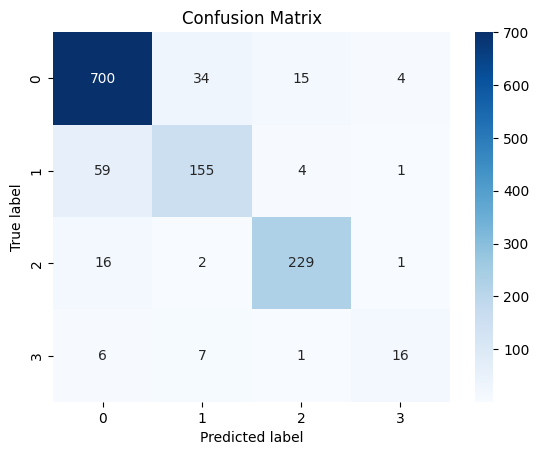

In [ ]:
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  5000


In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  875,  876, 2277],
      dtype=int32)

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
pad_X_train, pad_X_validation, y_train_lstm, y_validation_lstm= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()

model1.add(Embedding(3750, 300, weights = [X_train_w2v_embeddings_array], input_length = max_sequence_len))

model1.add(Bidirectional(LSTM(units = 256, return_sequences = False))) # neuron
model1.add(Dense(4, activation = 'softmax')) # output
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.fit(pad_X_train, y_train_lstm, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 22s 127ms/step - loss: 0.9642 - accuracy: 0.6522
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 0.3029 - accuracy: 0.8940
Epoch 3/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0942 - accuracy: 0.9695
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 6/10
125/125 [==============================] - 2s 15ms/step - loss: 0.0115 - accuracy: 0.9973
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 8/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.9992
Epoch 9/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.9985
Epoch 10/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy:

In [ ]:
y_pred_lstm_CBoW = model1.predict(pad_X_validation)

y_pred_lstm_CBoW = np.argmax(y_pred_lstm_CBoW, axis = -1)

y_validation_lstm_CBoW = np.argmax(y_validation_lstm, axis = -1)

classification_report1 = classification_report(y_validation_lstm_CBoW, y_pred_lstm_CBoW)
print(classification_report1)

32/32 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       647
           1       0.74      0.82      0.78       176
           2       0.95      0.88      0.92       163
           3       0.44      0.50      0.47        14

    accuracy                           0.89      1000
   macro avg       0.76      0.78      0.77      1000
weighted avg       0.89      0.89      0.89      1000



####SkipGram

In [ ]:
!wget 'https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip'

--2024-06-11 23:10:21--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_wiki.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488871452 (1.4G) [application/zip]
Saving to: ‘full_grams_sg_300_wiki.zip’

full_grams_sg_300_w 100%[===================>]   1.39G  43.9MB/s    in 19s     

2024-06-11 23:10:40 (75.0 MB/s) - ‘full_grams_sg_300_wiki.zip’ saved [1488871452/1488871452]



In [ ]:
!unzip '/content/full_grams_sg_300_wiki.zip'

Archive:  /content/full_grams_sg_300_wiki.zip
  inflating: full_grams_sg_300_wiki.mdl  
  inflating: full_grams_sg_300_wiki.mdl.trainables.syn1neg.npy   bad CRC 025479a0  (should be 55675a21)
  inflating: full_grams_sg_300_wiki.mdl.wv.vectors.npy  


In [ ]:
X = x = traindata['Preprocessed']
y = traindata['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from gensim.models import Word2Vec


In [ ]:
w2v_model = Word2Vec.load('/content/full_grams_sg_300_wiki.mdl')
embedding_dim = w2v_model.vector_size
OOV_tokens = []
train_tokens = []
test_tokens = []

def get_doc_vec(sent, model, data):
    w2v_embeddings = []
    tokens = sent.split()
    for word in tokens:
        try:
            if data == 'train':
                w2v_embeddings.append(model.wv[word])
                train_tokens.append(word)
            else:
                w2v_embeddings.append(model.wv[word])
                test_tokens.append(word)
        except:
            OOV_tokens.append(word)
            continue
    if len(w2v_embeddings) == 0:
        return None
    return sum(w2v_embeddings) / len(w2v_embeddings)

X_train_w2v_embeddings = X_train.apply(lambda sent: get_doc_vec(sent, w2v_model, 'train'))
X_test_w2v_embeddings = X_test.apply(lambda sent: get_doc_vec(sent, w2v_model, 'test'))

In [ ]:
X_train_w2v_embeddings_list = []
for embedding in X_train_w2v_embeddings:
    if embedding is not None:
        X_train_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_train_w2v_embeddings_list.append(np.zeros_like(X_train_w2v_embeddings[0]))

X_test_w2v_embeddings_list = []
for embedding in X_test_w2v_embeddings:
    if embedding is not None:
        X_test_w2v_embeddings_list.append(embedding)
    else:
        # Handle cases where the embedding is None
        X_test_w2v_embeddings_list.append(np.zeros_like(X_test_w2v_embeddings[0]))


In [ ]:
X_train_w2v_embeddings_array_skip = np.array(X_train_w2v_embeddings_list)
X_test_w2v_embeddings_array_skip = np.array(X_test_w2v_embeddings_list)

##### Naive bayes

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_w2v_embeddings_array_skip, y_train)

y_pred = naive_bayes_classifier.predict(X_test_w2v_embeddings_array_skip)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       753
           1       0.72      0.81      0.76       219
           2       0.96      0.87      0.91       248
           3       0.53      0.83      0.65        30

    accuracy                           0.88      1250
   macro avg       0.78      0.85      0.81      1250
weighted avg       0.89      0.88      0.88      1250



#####logistic

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_w2v_embeddings_array, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X_test_w2v_embeddings_array)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       753
           1       0.88      0.78      0.82       219
           2       0.96      0.94      0.95       248
           3       0.95      0.60      0.73        30

    accuracy                           0.92      1250
   macro avg       0.93      0.82      0.86      1250
weighted avg       0.92      0.92      0.92      1250



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
labels = np.asarray(group_counts).reshape(4, 4)

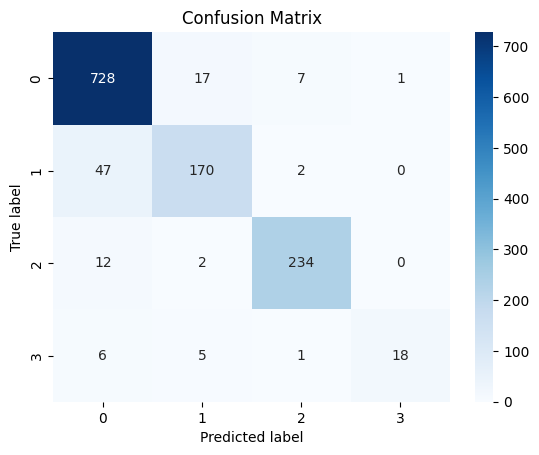

In [ ]:
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#####LSTM

In [ ]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(traindata['Preprocessed'])
input_sequences = []
for line in traindata['Preprocessed']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  5000


In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  875,  876, 2277],
      dtype=int32)

In [ ]:
from keras.utils import to_categorical

labels = traindata['Type']
y_categorical = to_categorical(labels, num_classes=4)

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(input_sequences, y_categorical, test_size = 0.2, random_state = 42)

In [ ]:
model1 = Sequential()
model1.add(Embedding(3750, 300, weights = [X_train_w2v_embeddings_array_skip], input_length = max_sequence_len))
model1.add(Bidirectional(LSTM(units = 256, return_sequences = False)))
model1.add(Dense(4, activation = 'softmax'))
adam = Adam(learning_rate = 0.01)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model1.fit(pad_X_train, y_train_lstm, epochs = 10, verbose = 1)

Epoch 1/10
125/125 [==============================] - 15s 58ms/step - loss: 0.6706 - accuracy: 0.7650
Epoch 2/10
125/125 [==============================] - 2s 14ms/step - loss: 0.1868 - accuracy: 0.9413
Epoch 3/10
125/125 [==============================] - 1s 12ms/step - loss: 0.0654 - accuracy: 0.9805
Epoch 4/10
125/125 [==============================] - 1s 10ms/step - loss: 0.0292 - accuracy: 0.9915
Epoch 5/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0096 - accuracy: 0.9973
Epoch 6/10
125/125 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0069 - accuracy: 0.9990
Epoch 8/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.9977
Epoch 9/10
125/125 [==============================] - 1s 9ms/step - loss: 0.0077 - accuracy: 0.9985
Epoch 10/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: